In [28]:
import numpy as np
from qiskit import *

Performing block encoding of $2\times2$ matrix on the form:
\begin{equation}
A=\frac{1}{2}(\alpha_1I+\alpha_2\sigma_x)=\frac{1}{2}\begin{pmatrix} \alpha_1 \alpha_2 \\ \alpha_2 \alpha_1
\end{pmatrix}
\end{equation}

In [29]:
alpha_1, alpha_2 = 3, 4
A = 1/2 * np.array([[alpha_1, alpha_2],[alpha_2, alpha_1]])
print(A)

[[1.5 2. ]
 [2.  1.5]]


In [30]:
spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A.T@A-np.eye(2))))
A = 1/2*A/spectral_norm
print(A)

[[0.2236068 0.2981424]
 [0.2981424 0.2236068]]


In [31]:
alpha_1, alpha_2 = 2*A[0,0], 2*A[0,1]
print(alpha_1,alpha_2)

0.4472135954999579 0.5962847939999439


In [32]:
theta_1 = np.arccos(alpha_1)
theta_2 = np.arccos(alpha_2) - theta_1
print(theta_1, theta_2)

1.1071487177940904 -0.17521753523460504


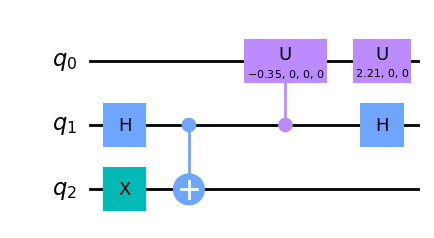

In [33]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [34]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [35]:
# Create a Quantum Program for execution
job = backend.run(circ)

In [36]:
result = job.result()
statevector_result = np.array(result.data()['statevector'])
for entry in statevector_result:
        print(entry)

(0.29814239699997197-3.651191321761351e-17j)
(0.4013864859597432-4.9155667525160346e-17j)
(-0.298142396999972+3.6511913217613517e-17j)
(-0.40138648595974324+4.915566752516036e-17j)
(0.22360679774997907+0j)
(0.447213595499958+0j)
(0.22360679774997905+0j)
(0.4472135954999579+0j)


In [37]:
A[0][0]*2

0.4472135954999579

In [38]:
statevector_result.T@statevector_result

(1.0000000000000002-1.2246467991473535e-16j)

In [39]:
# Probability |0>|0>|j>
statevector_result[0]**2+statevector_result[1]**2

(0.25-6.123233995736766e-17j)

In [40]:
# Matrix repr. of circuit
import qiskit.quantum_info as qi
op = qi.Operator(circ)
print(op.data)

[[ 0.2981424 +0.j -0.40138649+0.j -0.2981424 +0.j  0.40138649+0.j
   0.2236068 +0.j -0.4472136 +0.j  0.2236068 +0.j -0.4472136 +0.j]
 [ 0.40138649+0.j  0.2981424 +0.j -0.40138649+0.j -0.2981424 +0.j
   0.4472136 +0.j  0.2236068 +0.j  0.4472136 +0.j  0.2236068 +0.j]
 [-0.2981424 +0.j  0.40138649+0.j  0.2981424 +0.j -0.40138649+0.j
   0.2236068 +0.j -0.4472136 +0.j  0.2236068 +0.j -0.4472136 +0.j]
 [-0.40138649+0.j -0.2981424 +0.j  0.40138649+0.j  0.2981424 +0.j
   0.4472136 +0.j  0.2236068 +0.j  0.4472136 +0.j  0.2236068 +0.j]
 [ 0.2236068 +0.j -0.4472136 +0.j  0.2236068 +0.j -0.4472136 +0.j
   0.2981424 +0.j -0.40138649+0.j -0.2981424 +0.j  0.40138649+0.j]
 [ 0.4472136 +0.j  0.2236068 +0.j  0.4472136 +0.j  0.2236068 +0.j
   0.40138649+0.j  0.2981424 +0.j -0.40138649+0.j -0.2981424 +0.j]
 [ 0.2236068 +0.j -0.4472136 +0.j  0.2236068 +0.j -0.4472136 +0.j
  -0.2981424 +0.j  0.40138649+0.j  0.2981424 +0.j -0.40138649+0.j]
 [ 0.4472136 +0.j  0.2236068 +0.j  0.4472136 +0.j  0.2236068 +0.j
  -

In [41]:
nul, et = np.array([[1],[0]]), np.array([[0],[1]])
np.kron(et,et)

array([[0],
       [0],
       [0],
       [1]])